#### Exercise 15.3: Molecular motion.
+ Modify rw_visual.py by replacing ax.scatter() with
ax.plot(). To simulate the path of a pollen grain on the surface of a drop of
water, pass in the rw.x_values and rw.y_values, and include a linewidth argu-
ment. Use 5,000 instead of 50,000 points to keep the plot from being too busy.

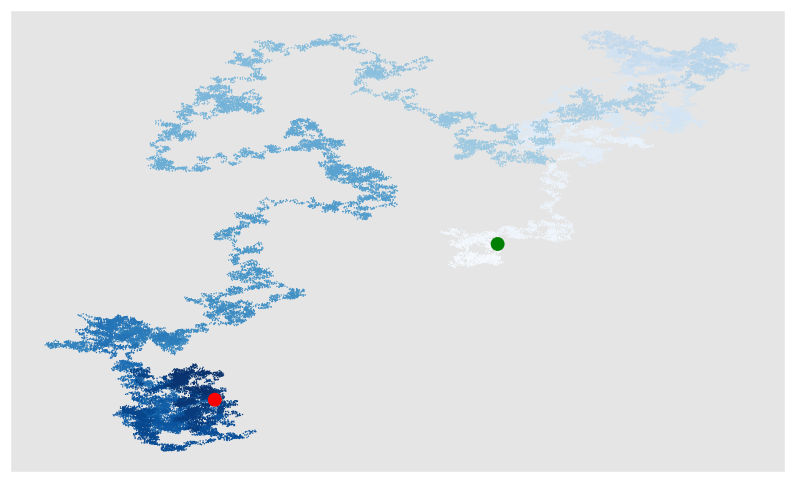

In [2]:
import matplotlib.pyplot as plt
from random_walk import RandomWalk

while True:
    rw = RandomWalk(50_000)
    rw.fill_walk()

    plt.style.use('ggplot')  
    fig, ax = plt.subplots(figsize=(10, 6))
    point_numbers = range(rw.num_points)
    ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
               edgecolor='none', s=1)

    ax.scatter(0, 0, c='green', edgecolor='none', s=100)  
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolor='none', s=100) 

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running.lower() != 'y':
        break


#### Exercise 15.4: Modified Random Walks: 
+ In the RandomWalk class, x_step and y_step are generated from the same set of conditions. The direction is chosen randomly from the list [1, -1] and the distance from the list [0, 1, 2, 3, 4]. Modify the values in these lists to see what happens to the overall shape of your walks. Try a longer list of choices for the distance, such as 0 through 8, or remove the −1 from the x- or y-direction list.

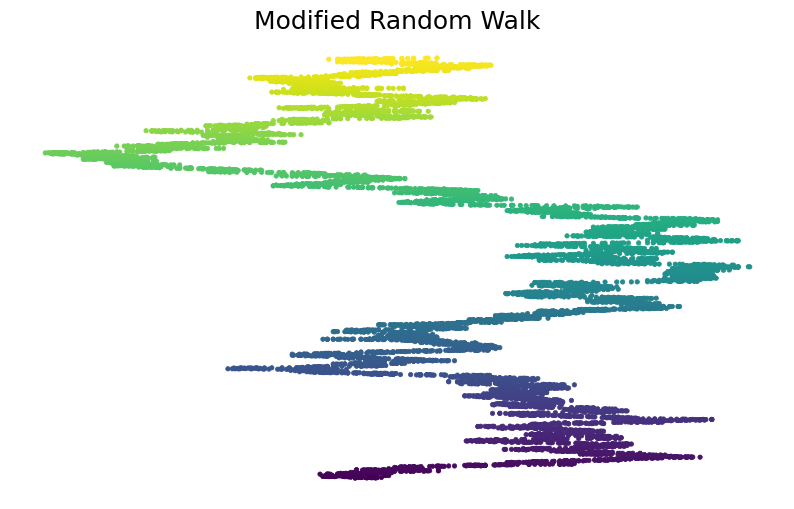

In [3]:
import matplotlib.pyplot as plt
from random import choice

class RandomWalk:

    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([1, -1])
            x_distance = choice(range(0, 9)) 
            x_step = x_direction * x_distance

            y_direction = choice([1])  
            y_distance = choice(range(0, 5))  
            y_step = y_direction * y_distance

            if x_step == 0 and y_step == 0:
                continue

            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)

rw = RandomWalk(10_000)
rw.fill_walk()

plt.figure(figsize=(10, 6))
plt.scatter(rw.x_values, rw.y_values, c=range(rw.num_points), cmap=plt.cm.viridis, s=10)
plt.title("Modified Random Walk", fontsize=18)
plt.axis('off')
plt.show()


#### Exercise 15-5. Refactoring: 
The fill_walk() method is lengthy. Create a new method called get_step() to determine the direction and distance for each step, and then calculate the step. You should end up with two calls to get_step() in fill_walk():
    x_step = self.get_step()
    y_step = self.get_step()
This refactoring should reduce the size of fill_walk() and make the
method easier to read and understand.

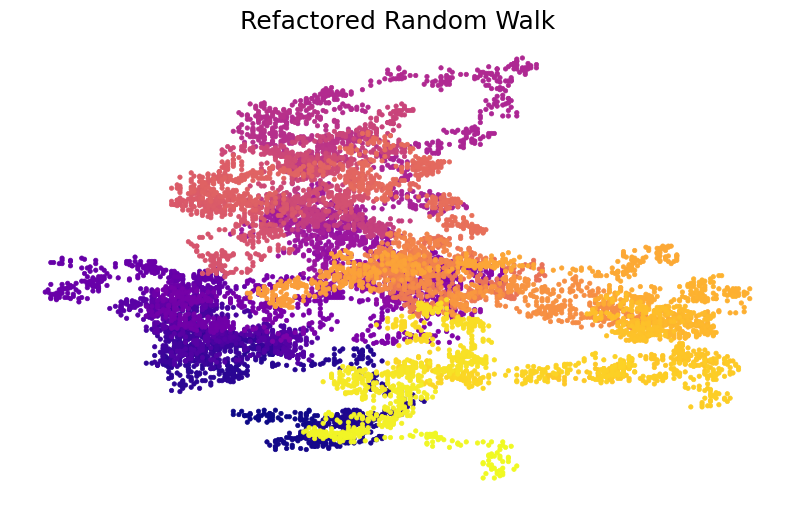

In [4]:
import matplotlib.pyplot as plt
from random import choice

class RandomWalk:

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def get_step(self):
        """Determine the direction and distance for a step."""
        direction = choice([1, -1])
        distance = choice([0, 1, 2, 3, 4])
        return direction * distance

    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values) < self.num_points:
            x_step = self.get_step()
            y_step = self.get_step()

            if x_step == 0 and y_step == 0:
                continue

            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)

rw = RandomWalk(10_000)
rw.fill_walk()

plt.figure(figsize=(10, 6))
plt.scatter(rw.x_values, rw.y_values, c=range(rw.num_points), cmap=plt.cm.plasma, s=10)
plt.title("Refactored Random Walk", fontsize=18)
plt.axis('off')
plt.show()
